# Decision Tree

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Carregando dados
cancer = load_breast_cancer()

In [3]:
# dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target,
                                                   random_state=42)

In [6]:
# Treinando modelo
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [7]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


## Decision Tree - **max_depth = 4** 

In [4]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
print("Accuracy on training set: {:.3f}".format(tree_4.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree_4.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Analyzing decision trees

In [6]:
from sklearn.tree import export_graphviz
import graphviz

In [7]:
export_graphviz(tree_4, out_file="tree_4.dot", class_names=['malignant','benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

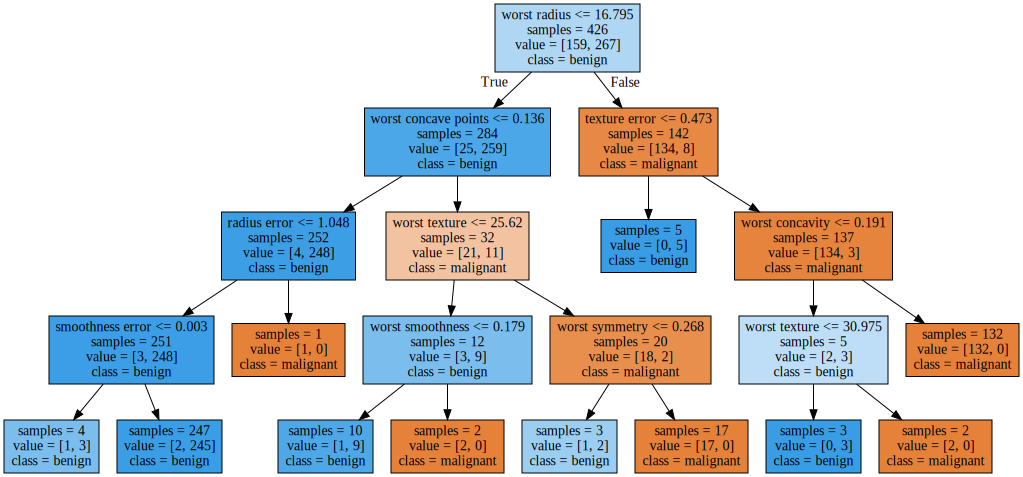

In [7]:
with open("tree_4.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Feature importance in trees 

In [8]:
print("Feature importances:\n{}".format(tree_4.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


In [34]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.bar(range(n_features),model.feature_importances_, align='center')
    plt.xticks(np.arange(n_features),cancer.feature_names,rotation='vertical')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


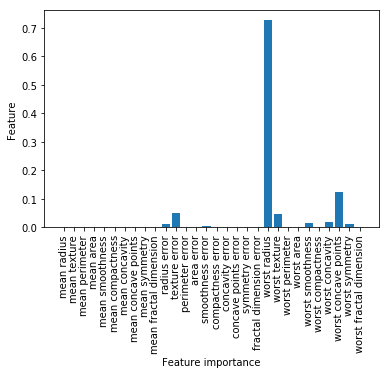

In [35]:
plot_feature_importance_cancer(tree_4)